Let's predict the length of each prison sentence in month usin the features we've selected specifically for this. We are focusing on prison sentence, but we may also work with other variables such as fines or material retribution ordered.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
prison_sentences = pd.read_csv('prison_sentences_cleaned_08.csv')
print("Shape: ", prison_sentences.shape)
print("Columns: ", prison_sentences.columns)
prison_sentences.head()

Shape:  (494469, 25)
Columns:  Index(['prisonSentence_months', 'drugCase_safetyValve',
       'offenseLevel_plusChapter2SOCs', 'defendant_has_criminalHistory',
       'defendant_gender', 'defendant_pastSentences_last60days',
       'defendant_pastSentences_last60to13months',
       'defendant_pastSentences_13months', 'SOC_weaponEnhancement',
       'case_uniqueStatutes', 'levelsAdded_flightFromLawEnforcement',
       'levelsSubstractted_mitigatingRole', 'levelsAdded_obstructionOfJustice',
       'courtDistrict_id_24', 'courtDistrict_id_36', 'courtDistrict_id_43',
       'courtDistrict_id_64', 'courtDistrict_id_68',
       'pleaAgreement_documentStatus_1.0', 'pleaAgreement_documentStatus_8.0',
       'defendant_race_1.0', 'defendant_race_2.0',
       'preSentence_detention_status_1.0', 'preSentence_detention_status_3.0',
       'defendant_countryOfCitizenship_211.0'],
      dtype='object')


,prisonSentence_months,drugCase_safetyValve,offenseLevel_plusChapter2SOCs,defendant_has_criminalHistory,defendant_gender,defendant_pastSentences_last60days,defendant_pastSentences_last60to13months,defendant_pastSentences_13months,SOC_weaponEnhancement,case_uniqueStatutes,...,courtDistrict_id_43,courtDistrict_id_64,courtDistrict_id_68,pleaAgreement_documentStatus_1.0,pleaAgreement_documentStatus_8.0,defendant_race_1.0,defendant_race_2.0,preSentence_detention_status_1.0,preSentence_detention_status_3.0,defendant_countryOfCitizenship_211.0
0,24.0,0.0,24.0,1.0,0.0,0.0,1.0,0.0,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8.0,0.0,12.0,1.0,0.0,0.0,1.0,0.0,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,0.0,8.0,1.0,0.0,2.0,0.0,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,6.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,18.0,0.0,14.0,1.0,0.0,0.0,0.0,1.0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
prison_sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494469 entries, 0 to 494468
Data columns (total 25 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   prisonSentence_months                     494469 non-null  float64
 1   drugCase_safetyValve                      494469 non-null  float64
 2   offenseLevel_plusChapter2SOCs             494469 non-null  float64
 3   defendant_has_criminalHistory             494469 non-null  float64
 4   defendant_gender                          494469 non-null  float64
 5   defendant_pastSentences_last60days        494469 non-null  float64
 6   defendant_pastSentences_last60to13months  494469 non-null  float64
 7   defendant_pastSentences_13months          494469 non-null  float64
 8   SOC_weaponEnhancement                     494469 non-null  int64  
 9   case_uniqueStatutes                       494469 non-null  int64  
 10  levelsAdded_flightFr

## Building and testing predictive models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

Splitting the data

In [23]:
df = prison_sentences.copy()
X = df.drop(columns=['prisonSentence_months'])
target = 'prisonSentence_months'
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Some functions to compare and evaluate

In [24]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE : {mae:.2f}")
    print(f"  R²  : {r2:.3f}")

def plot_predictions(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Sentence (months)')
    plt.ylabel('Predicted Sentence (months)')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_mdi(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10,6))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.title(title)
    plt.ylabel("Mean Decrease in Impurity")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

Building the models

In [25]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)


xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='rmse',
    verbosity=0,
    random_state=42
)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'rmse'


## Evaluation

### Metrics

In [26]:
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(gb, X_test, y_test, "Gradient Boosting")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


Random Forest Performance:
  RMSE: 35.71
  MAE : 19.18
  R²  : 0.686

Gradient Boosting Performance:
  RMSE: 35.58
  MAE : 19.16
  R²  : 0.688

XGBoost Performance:
  RMSE: 35.63
  MAE : 19.30
  R²  : 0.687


### Example predictions

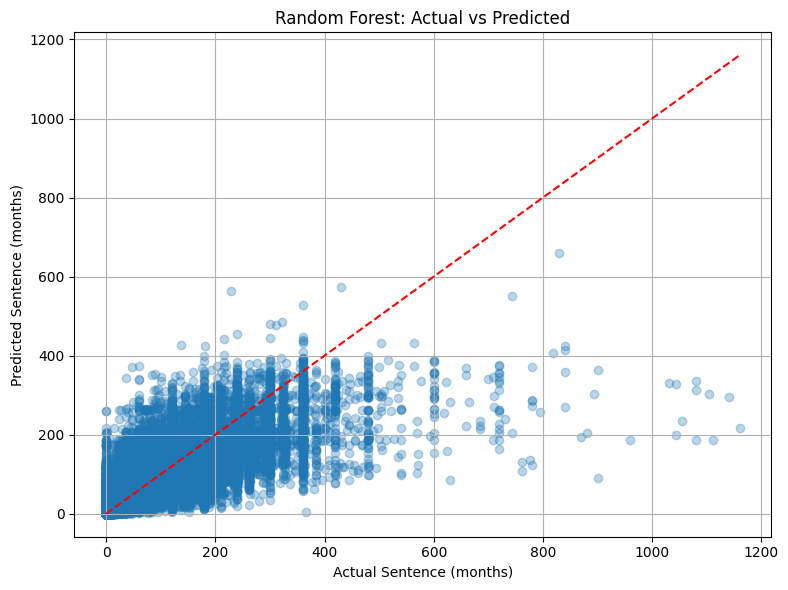

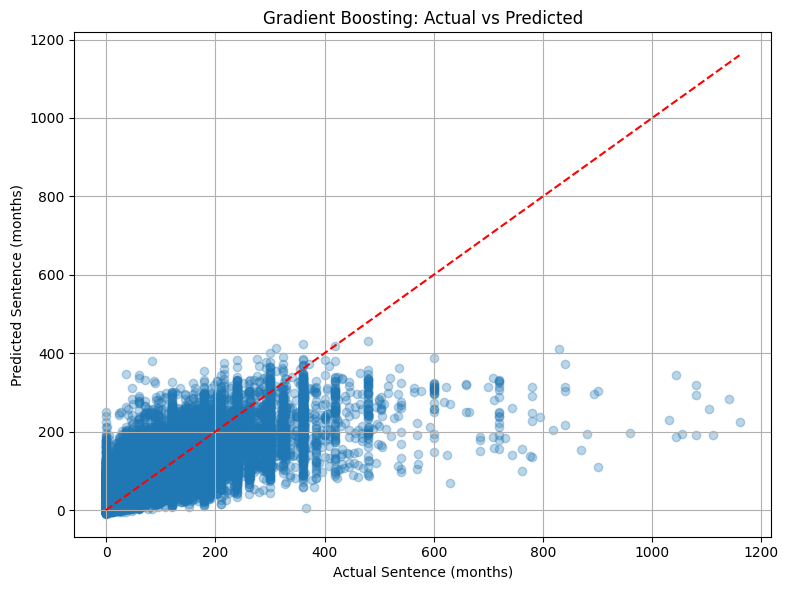

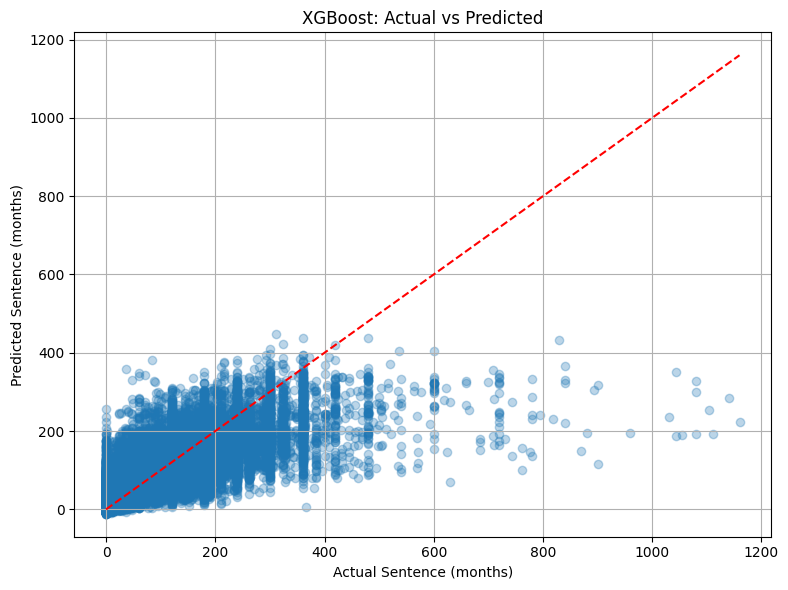

In [27]:
plot_predictions(rf, X_test, y_test, "Random Forest: Actual vs Predicted")
plot_predictions(gb, X_test, y_test, "Gradient Boosting: Actual vs Predicted")
plot_predictions(xgb_model, X_test, y_test, "XGBoost: Actual vs Predicted")

### MDI

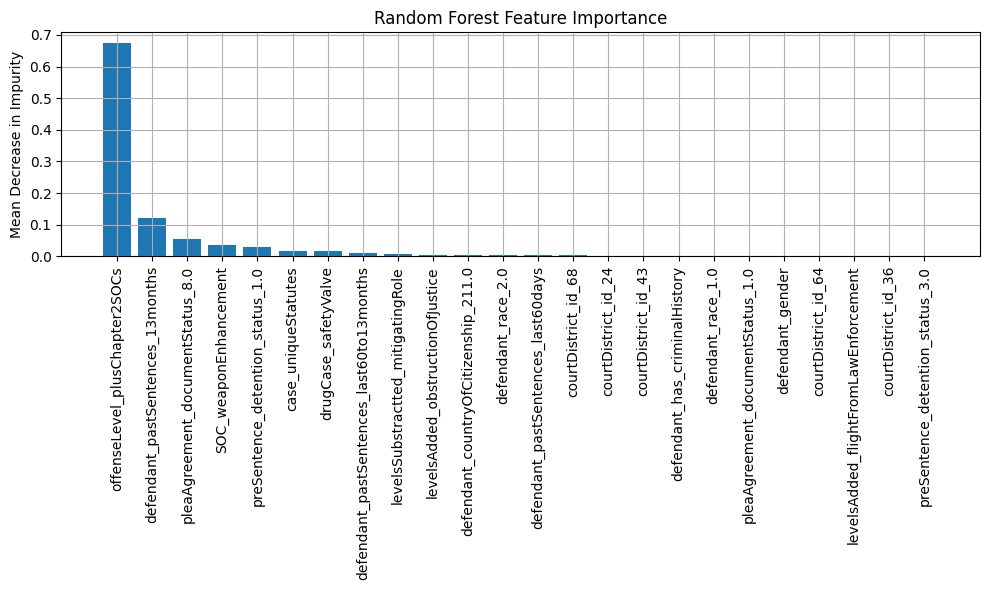

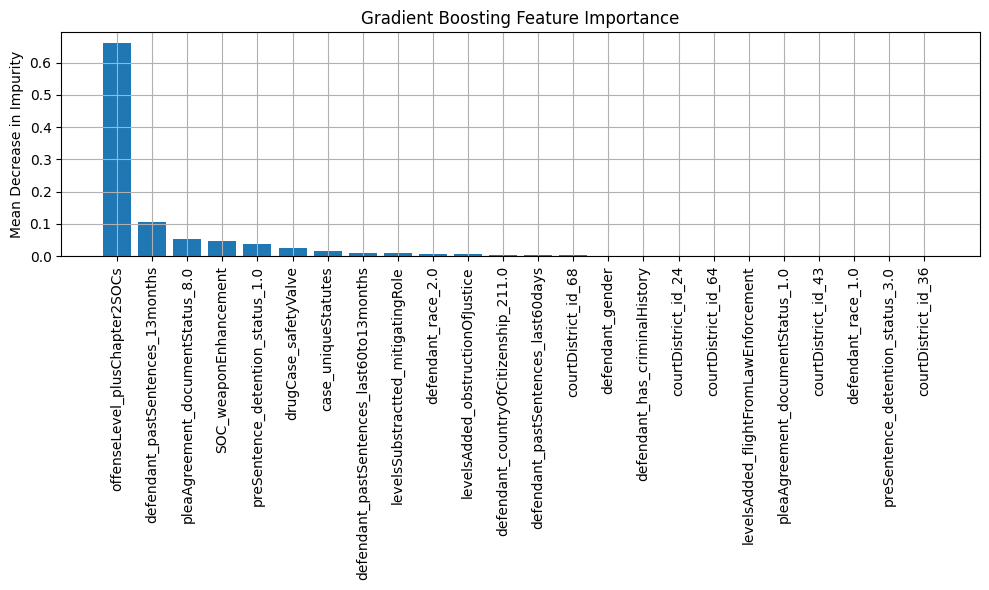

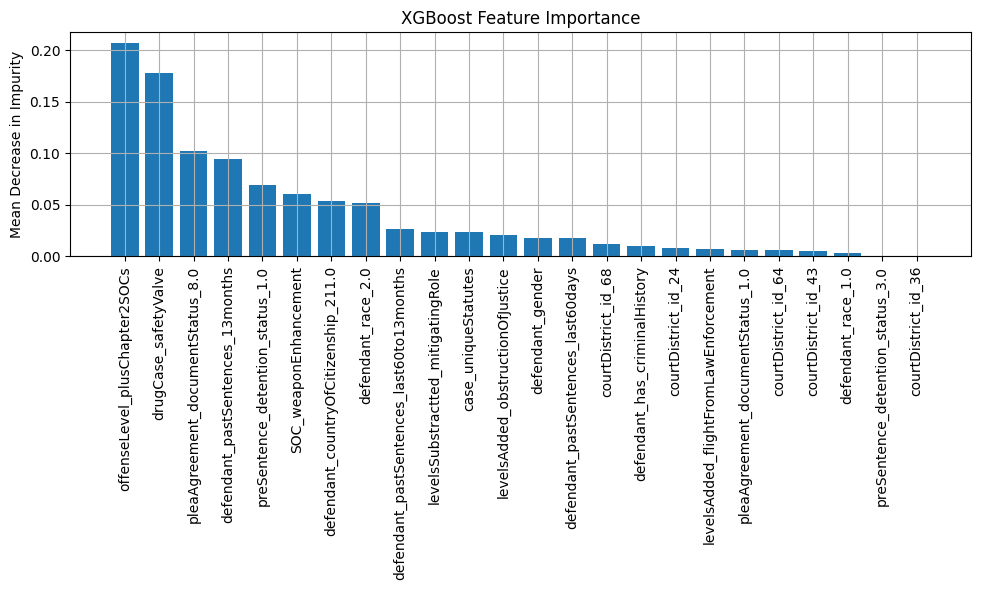

In [28]:
plot_mdi(rf, X_train.columns, "Random Forest Feature Importance")
plot_mdi(gb, X_train.columns, "Gradient Boosting Feature Importance")
plot_mdi(xgb_model, X_train.columns, "XGBoost Feature Importance")


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],              # Avoid `None` for now
    'min_samples_split': [2, 5],         # Fewer options
    'min_samples_leaf': [1, 2],
}

grid_search_tree = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_

print("Best Parameters:", grid_search_tree.best_params_)
print("Best RMSE:", (-grid_search_tree.best_score_)**0.5)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best RMSE: 38.04077775766707


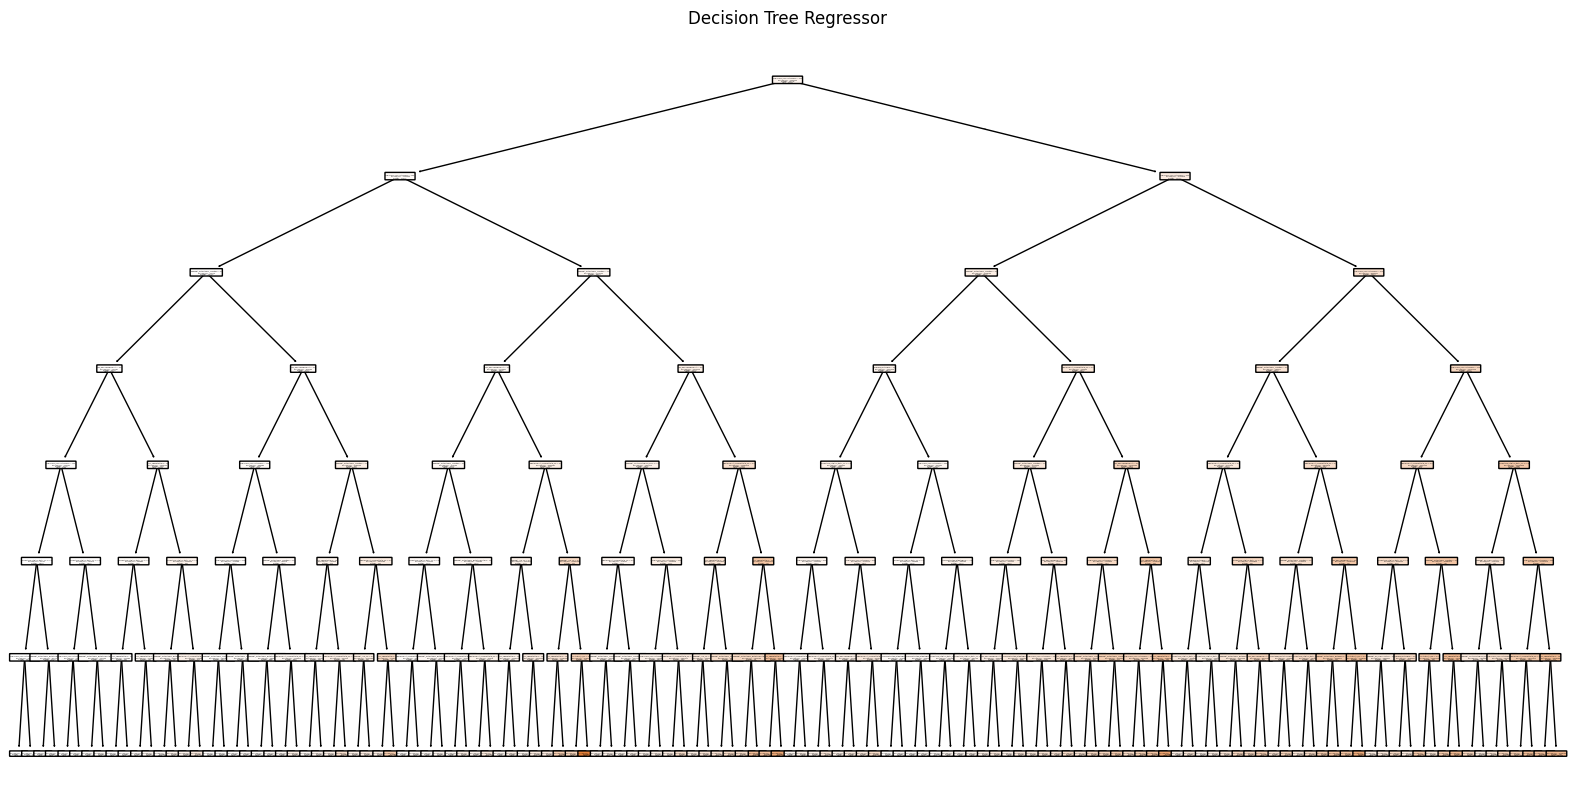


Decision Tree Performance:
  RMSE: 38.03
  MAE : 20.99
  R²  : 0.644


In [30]:
plt.figure(figsize=(20, 10))  # Adjust for size and readability
plot_tree(best_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()
evaluate_model(best_tree, X_test, y_test, "Decision Tree")

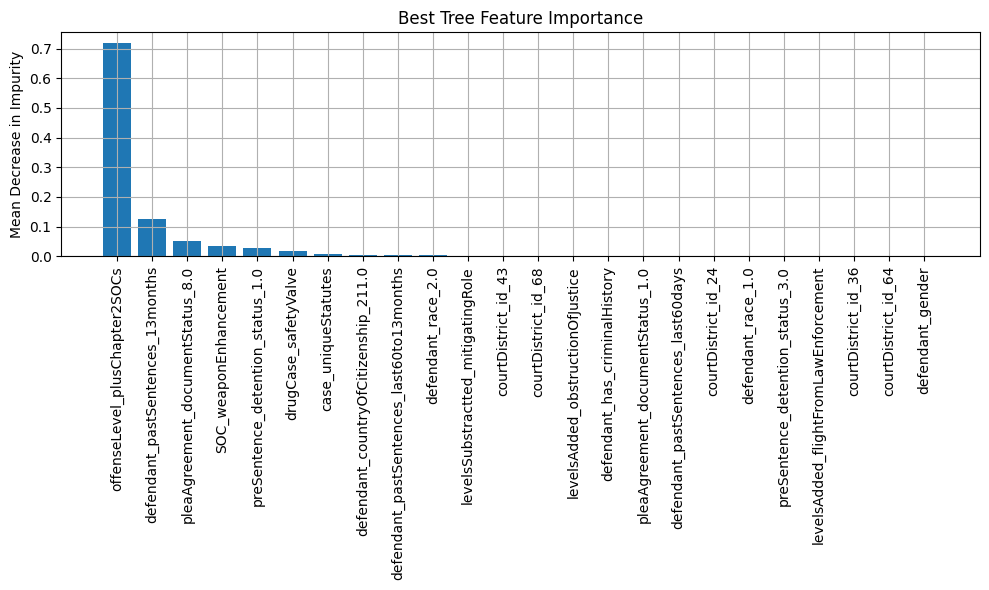

In [33]:
plot_mdi(best_tree, X_train.columns, "Best Tree Feature Importance")

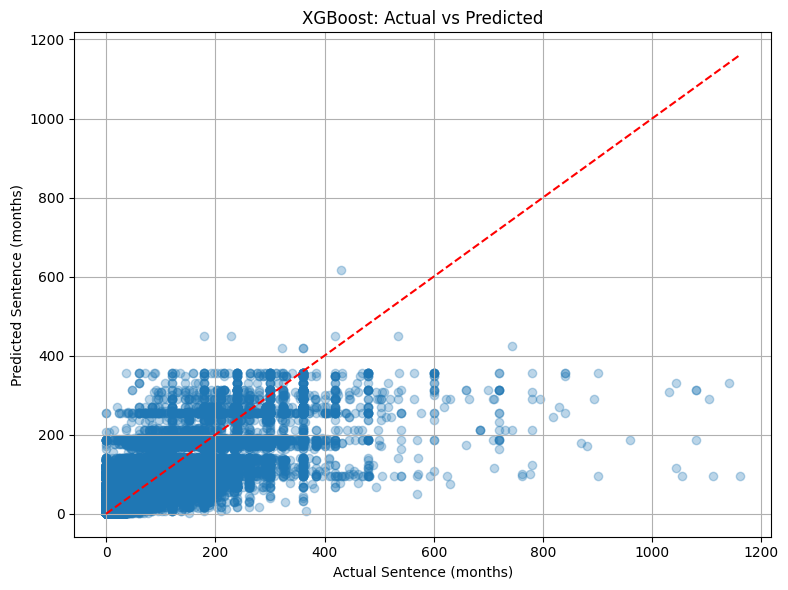

In [18]:
plot_predictions(best_tree, X_test, y_test, "XGBoost: Actual vs Predicted")


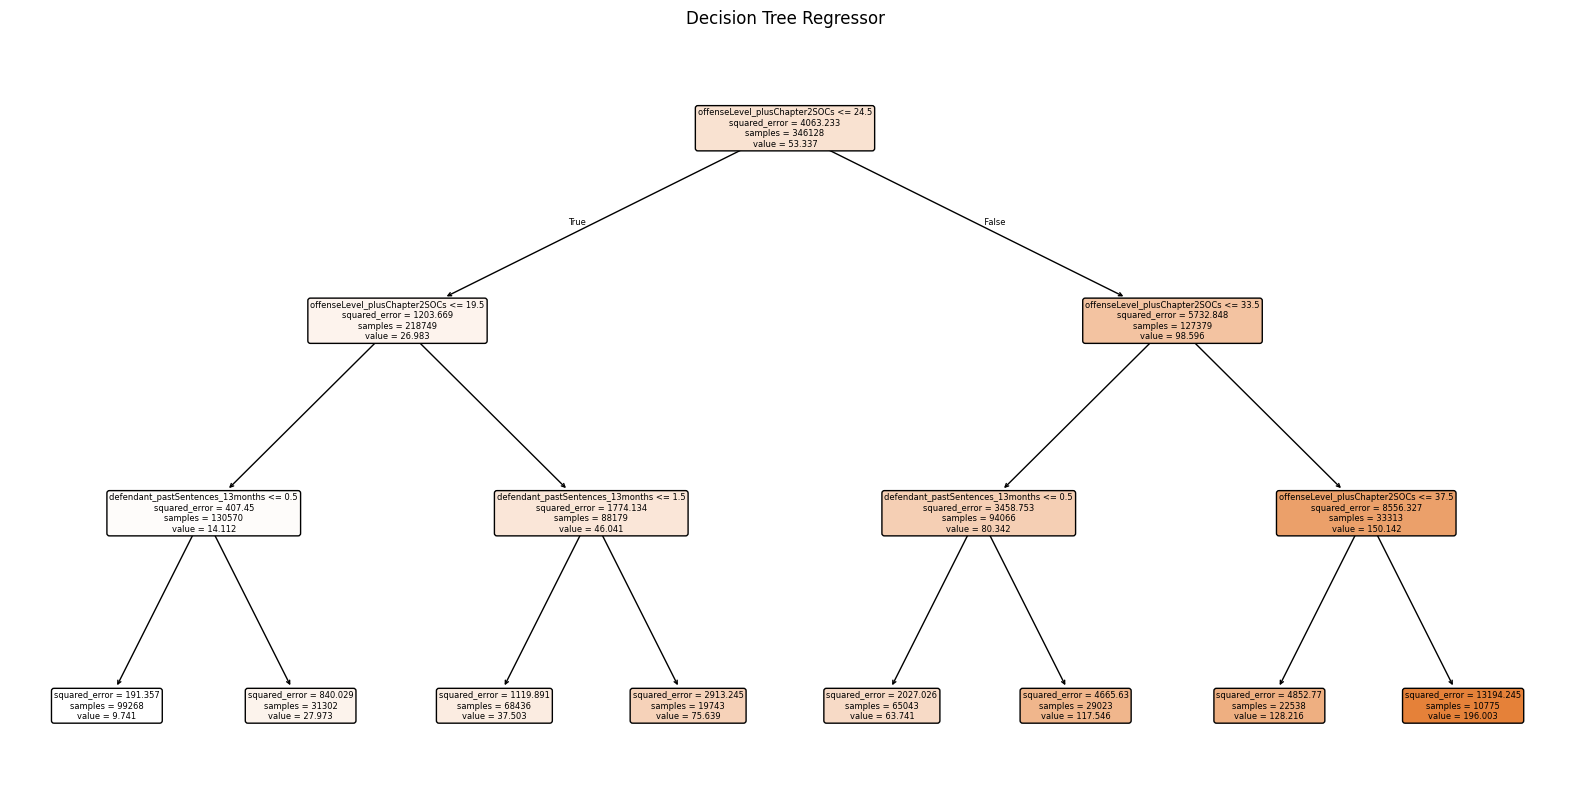


Decision Tree Performance:
  RMSE: 45.13
  MAE : 25.61
  R²  : 0.498


In [31]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)
plt.figure(figsize=(20, 10))  # Adjust for size and readability
plot_tree(tree_reg, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()
evaluate_model(tree_reg, X_test, y_test, "Decision Tree")
